JUPYTER NOTEBOOK CREATED BY

# DR. RAJAN GUPTA
# DEEN DAYAL UPADHYAYA COLLEGE
# UNIVERSITY OF DELHI
# rgupta.cs.du@gmail.com

In [26]:
#This will contain the content of Unit 5 from Chapter 9.1-9.2

Unit 5 - Data Visualization: Scatter Plot, line graph, histogram, boxplot, line plots, regression, word clouds, exporting plots as images.

In [27]:
#Import the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

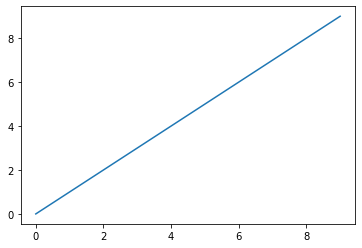

In [28]:
#Simple Line Plot
data = np.arange(10)
plt.plot(data)

**Figures & Subplots**

In [29]:
#figure can also be used for creating graphs
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

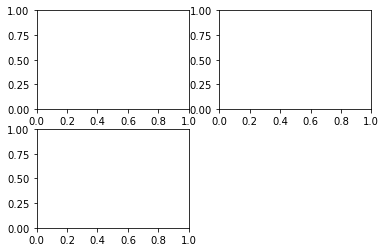

In [50]:
#creating subplots within a figure
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

**Adjusting the Spacing around subplots**

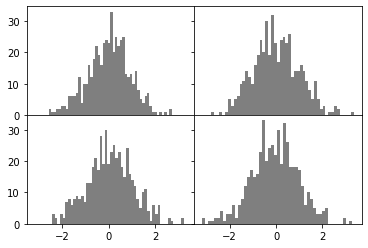

In [55]:
#We can adjust spaces using subplots_adjust function
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
  for j in range(2):
    axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

**Colors, Markers, and Line Styles**

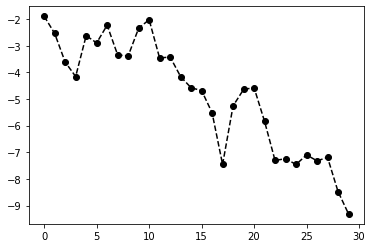

In [32]:
#color = black (k), linestyle = dashed, marker = o
plt.plot(np.random.randn(30).cumsum(), 'ko--')

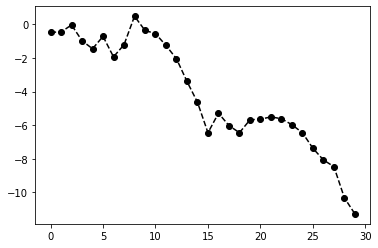

In [33]:
#similar thing can be implemented via following
plt.plot(np.random.randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

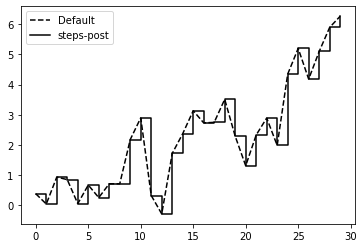

In [34]:
#Labels and legends
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

**Ticks, Labels & Legends**

Text(0.5, 0, 'Stages')

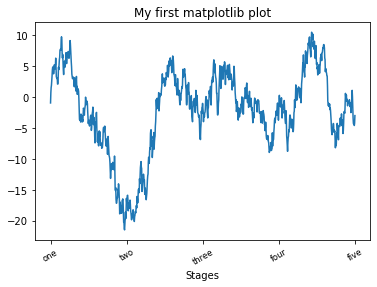

In [57]:
# setting the title, axis labels, ticks and ticklabels
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

**Adding Legends**

Text(0.5, 1.0, 'Random graphs for observations')

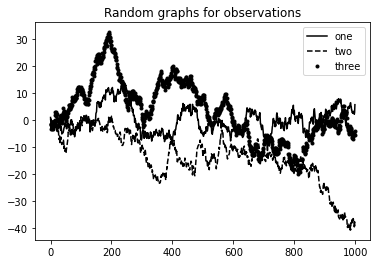

In [36]:
#we can add legend with each command also
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum(), 'k', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'k--', label='two')
ax.plot(np.random.randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')
ax.set_title('Random graphs for observations')

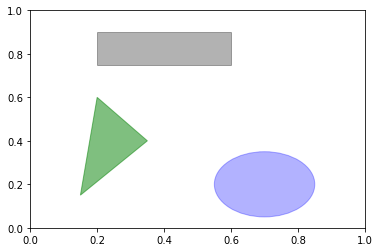

In [37]:
#Adding shapes
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

In [38]:
#saving plots in svg, png, pdf etc formats in the current working directory
plt.savefig('test.svg')

<Figure size 432x288 with 0 Axes>

**PLOTTING WITH PANDAS AND SEABORN**

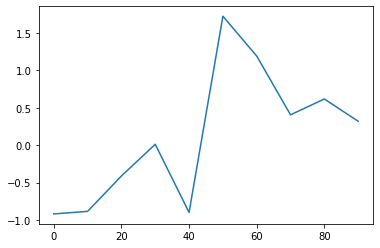

In [39]:
#Line Plot
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

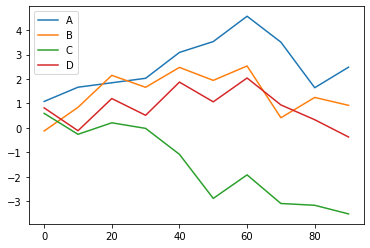

In [40]:
#Plotting multiple lines
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), columns=['A', 'B', 'C', 'D'], index=np.arange(0, 100, 10))
df.plot()

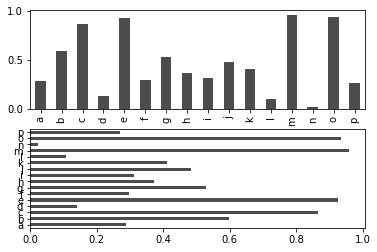

In [41]:
#Bar Charts - Vertical (bar) and Horizontal (barh)
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)
#k = black color, alpha denotes transparency

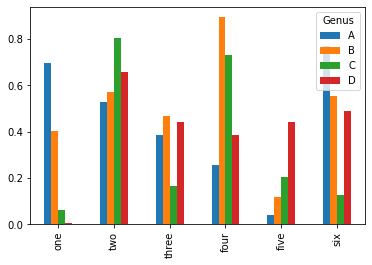

In [42]:
#Multiple bars
df = pd.DataFrame(np.random.rand(6, 4), index=['one', 'two', 'three', 'four', 'five', 'six'], columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df.plot.bar()

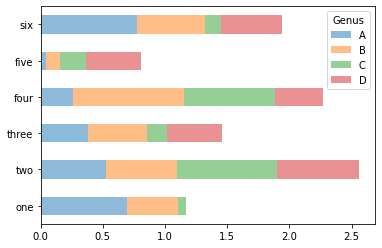

In [43]:
#horizontal stack bars with light transparency
df.plot.barh(stacked=True, alpha=0.5)

In [44]:
#Connecting with new datasets
#mounting the gdrive by entering the code generated by clicking on the link
from google.colab import drive 
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google'

In [ ]:
tips = pd.read_csv('/content/gdrive/My Drive/Classroom/Mckinney_Datasets/tips.csv')
tips

In [ ]:
#performing crosstabs
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

In [ ]:
party_counts = party_counts.loc[:, 2:5]
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

In [ ]:
party_pcts.plot.bar()

In [ ]:
#Plotting with seaborn package
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

In [ ]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

In [ ]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [ ]:
#Histograms and Density plots
tips['tip_pct'].plot.hist(bins=50)

In [ ]:
tips['tip_pct'].plot.density()

In [ ]:
#Scatter or point plots
macro = pd.read_csv('/content/gdrive/My Drive/Classroom/Mckinney_Datasets/macrodata.csv')

In [ ]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

In [ ]:
# Regression Plot with line represnting the data points
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

In [ ]:
#Scatter plot for each variable pair
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

In [ ]:
#Facet Grids and Categorical Data
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

In [ ]:
sns.factorplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

In [ ]:
#Box plot
sns.factorplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5])